# Criação de Modelo Digital de Terreno (MDT) a partir de dados LiDAR

Este notebook demonstra como criar um Modelo Digital de Terreno (MDT) a partir de dados LiDAR utilizando diferentes métodos de interpolação.

## Instalação de Dependências (opcional)

Execute a célula abaixo se você quiser instalar o PDAL e outras dependências opcionais. Caso contrário, o notebook utilizará métodos alternativos.

In [1]:
# Importando as bibliotecas necessárias
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Importando os módulos personalizados
from lidar.lidarReadAndViewer import LidarFileHandler, LidarInfo, LidarVisualization
from lidar.lidarDTM import DTMGenerator, TerrainAnalysis, ContourGenerator

# Configuração para exibir figuras no notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## 1. Seleção e carregamento de dados LiDAR

In [2]:
# Listar arquivos LAS/LAZ disponíveis
las_files, data_dir = LidarFileHandler.list_las_files(data_dir="data")

if not las_files:
    print("Nenhum arquivo LAS/LAZ encontrado no diretório 'data'.")
else:
    print(f"Foram encontrados {len(las_files)} arquivos LiDAR no diretório '{data_dir}'.")
    # Criar widget para selecionar arquivo
    file_dropdown, selected_file_path = LidarFileHandler.create_file_selector(las_files, data_dir)
    display(file_dropdown)

Foram encontrados 6 arquivos LiDAR no diretório 'data'.


Dropdown(description='Select file:', options=('USGS_LPC_NE_Statewide_D23_13T_FG_7085.las', 'USGS_LPC_NE_Statew…

In [3]:
# Carregar o arquivo LiDAR selecionado
if 'selected_file_path' in locals() and selected_file_path:
    las_data = LidarFileHandler.read_las_file(selected_file_path)
else:
    print("Por favor, selecione um arquivo LiDAR primeiro.")


File loaded successfully!


## 2. Criação do Modelo Digital de Terreno (MDT)

In [9]:
# Definir a resolução do MDT
resolution_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=5.0,
    step=0.1,
    description='Resolução (m):',
    continuous_update=False,
    style={'description_width': 'initial'}
)
display(resolution_slider)

FloatSlider(value=1.0, continuous_update=False, description='Resolução (m):', max=5.0, min=0.1, style=SliderSt…

In [10]:
# Criar o gerador de MDT
if 'las_data' in locals() and las_data is not None:
    dtm_generator = DTMGenerator(las_data, resolution=resolution_slider.value)
    print(f"Gerador de MDT inicializado com resolução de {resolution_slider.value}m")
else:
    print("Dados LiDAR não carregados.")

Gerador de MDT inicializado com resolução de 1.0000000000000002m


### 2.1 Método de interpolação simples

Extracted 23,389,564 ground points out of 24,636,066 total points
Creating grid with dimensions: 1000 x 1000
Interpolating with method: linear
DTM created with grid size: 1000 x 1000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24327617207263372..1.0].


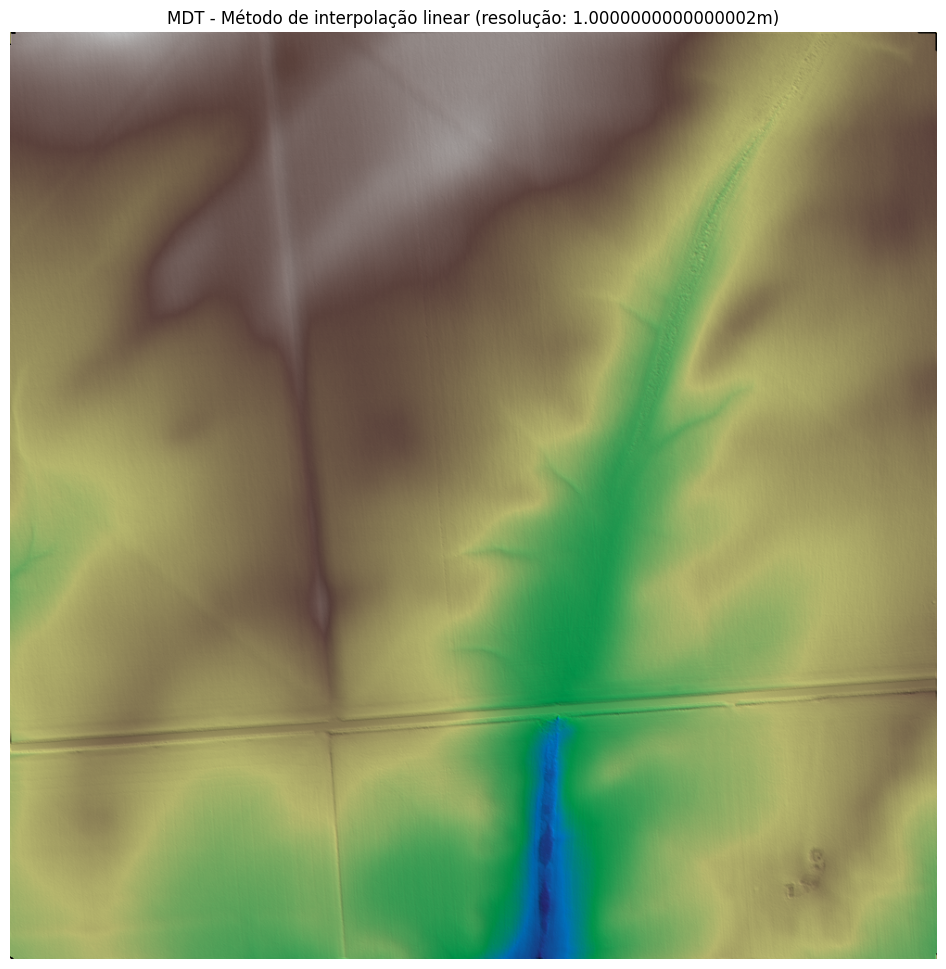

In [11]:
# Criar MDT usando interpolação simples
if 'dtm_generator' in locals():
    dtm_simple = dtm_generator.generate_simple_dtm(method='linear')
    # Visualizar o MDT
    fig = dtm_generator.visualize_dtm(add_hillshade=True)
    plt.title(f"MDT - Método de interpolação linear (resolução: {resolution_slider.value}m)")
    plt.show()
else:
    print("Gerador de MDT não inicializado.")

### 2.2 Método Radial Basis Function (RBF)

In [ ]:
# Criar MDT usando interpolação RBF
if 'dtm_generator' in locals():
    print("Gerando MDT usando Radial Basis Function (RBF)...")
    print("Esta operação pode levar alguns minutos dependendo do tamanho do conjunto de dados.")
    dtm_rbf = dtm_generator.generate_rbf_dtm(function='thin_plate', smooth=0.1)
    # Visualizar o MDT
    fig = dtm_generator.visualize_dtm(add_hillshade=True)
    plt.title(f"MDT - Método RBF (thin_plate) (resolução: {resolution_slider.value}m)")
    plt.show()
else:
    print("Gerador de MDT não inicializado.")

Gerando MDT usando Radial Basis Function (RBF)...
Esta operação pode levar alguns minutos dependendo do tamanho do conjunto de dados.
Extracted 23,389,564 ground points out of 24,636,066 total points
Sampling 20,000 points for RBF fitting...
Creating grid with dimensions: 1000 x 1000
Training RBF with function: thin_plate, smoothing: 0.1


### 3.3 Método PDAL (mais avançado)

In [ ]:
# Criar MDT usando PDAL (se disponível, caso contrário usará um método alternativo)
if 'dtm_generator' in locals():
    print("Gerando MDT usando pipeline PDAL (ou método alternativo se PDAL não estiver disponível)...")
    print("Esta operação pode levar alguns minutos.")
    dtm_pdal = dtm_generator.generate_pdal_dtm()
    # Visualizar o MDT
    fig = dtm_generator.visualize_dtm(add_hillshade=True)
    plt.title(f"MDT - Método {'PDAL' if hasattr(dtm_generator.dtm, 'method') and 'pdal' in dtm_generator.dtm['method'] else 'Alternativo'} (resolução: {resolution_slider.value}m)")
    plt.show()
else:
    print("Gerador de MDT não inicializado.")

## 4. Pós-processamento do MDT

In [ ]:
# Aplicar pós-processamento ao MDT
if 'dtm_generator' in locals() and dtm_generator.dtm is not None:
    # Aplicar preenchimento de vazios e suavização
    dtm_generator.apply_post_processing(fill_nodata=True, smoothing='gaussian')
    
    # Visualizar o MDT pós-processado
    fig = dtm_generator.visualize_dtm(add_hillshade=True)
    plt.title(f"MDT Pós-processado (preenchido e suavizado)")
    plt.show()
else:
    print("MDT não disponível para pós-processamento.")

## 5. Análise do Terreno

In [ ]:
# Calcular e visualizar inclinação do terreno
if 'dtm_generator' in locals() and dtm_generator.dtm is not None:
    print("Calculando inclinação do terreno...")
    fig = TerrainAnalysis.visualize_terrain_attributes(dtm_generator.dtm, attribute='slope')
    plt.show()
else:
    print("MDT não disponível para análise.")

In [ ]:
# Calcular e visualizar aspecto do terreno
if 'dtm_generator' in locals() and dtm_generator.dtm is not None:
    print("Calculando aspecto do terreno...")
    fig = TerrainAnalysis.visualize_terrain_attributes(dtm_generator.dtm, attribute='aspect')
    plt.show()
else:
    print("MDT não disponível para análise.")

In [ ]:
# Calcular e visualizar hillshade
if 'dtm_generator' in locals() and dtm_generator.dtm is not None:
    print("Gerando hillshade...")
    fig = TerrainAnalysis.visualize_terrain_attributes(dtm_generator.dtm, attribute='hillshade')
    plt.show()
else:
    print("MDT não disponível para análise.")

In [ ]:
# Calcular e visualizar curvatura do terreno
if 'dtm_generator' in locals() and dtm_generator.dtm is not None:
    print("Calculando curvatura do terreno...")
    fig = TerrainAnalysis.visualize_terrain_attributes(dtm_generator.dtm, attribute='curvature')
    plt.show()
else:
    print("MDT não disponível para análise.")

In [ ]:
# Gerar curvas de nível
if 'dtm_generator' in locals() and dtm_generator.dtm is not None:
    print("Gerando curvas de nível...")
    interval_slider = widgets.IntSlider(
        value=5,
        min=1,
        max=20,
        step=1,
        description='Intervalo (m):',
        continuous_update=False
    )
    display(interval_slider)
    contour_set = ContourGenerator.generate_contours(dtm_generator.dtm, interval=interval_slider.value)
    plt.show()
else:
    print("MDT não disponível para análise.")

## 6. Exportação do MDT

In [ ]:
# Exportar MDT para diversos formatos
if 'dtm_generator' in locals() and dtm_generator.dtm is not None:
    # Selecionar formatos de exportação
    format_selector = widgets.SelectMultiple(
        options=['tif', 'asc', 'png', 'xyz'],
        value=['tif', 'png'],
        description='Formatos:',
        style={'description_width': 'initial'}
    )
    display(format_selector)
    
    # Botão para exportar
    export_button = widgets.Button(
        description='Exportar MDT',
        button_style='danger'
    )
    
    def on_export_button_clicked(b):
        formats = list(format_selector.value)
        print(f"Exportando MDT nos formatos: {', '.join(formats)}")
        output_files = dtm_generator.export_dtm(format_list=formats)
        print(f"Arquivos exportados: {output_files}")
    
    export_button.on_click(on_export_button_clicked)
    display(export_button)
else:
    print("MDT não disponível para exportação.")